### Importing the Libraries

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
from glob import glob
from tqdm import tqdm

### Path for normal audio files

In [38]:
normal_files = []
for i in range(0,7,2):
    data_dir = f"Audio_Files/0dB_fan/id_0{i}/normal"
    normal_files += glob(data_dir + '/*.wav')  
    
print(normal_files[0])

Audio_Files/0dB_fan/id_00/normal/00000059.wav


### Path for abnormal audio files

In [37]:
abnormal_files = []
for i in range(0,7,2):
    data_dir = f"Audio_Files/0dB_fan/id_0{i}/abnormal"
    abnormal_files += glob(data_dir + '/*.wav')  
    
print(abnormal_files[0])

Audio_Files/0dB_fan/id_00/abnormal/00000059.wav


### Zero Crossing Rate

- it is the number of times the signal changes value, from positive to negative

In [24]:
def zero_crossing_rate(data):
    zero_crossings = librosa.feature.zero_crossing_rate(data)
    return zero_crossings

### Spectral Centroids

-  It indicates where the center of mass of the spectrum is located.
-  The sample rate sr: which means how many samples are recorded per second.


In [25]:
def spectral_centroid(data, sr):
        
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
    return spectral_centroids

### Root Mean Square Energy
- The root mean square formula calculates the square root of the arithmetic mean of the square of the function that defines the continuous waveform

In [26]:
def rmse(data):
    rms_audio = librosa.feature.rms(data)[0]
    return rms_audio

### Amplitude Envelope

<div>
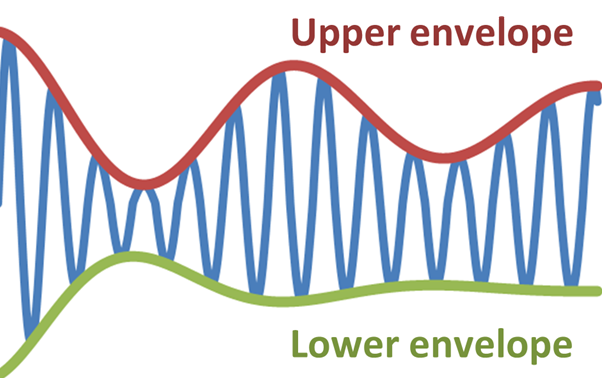
    - Envelope
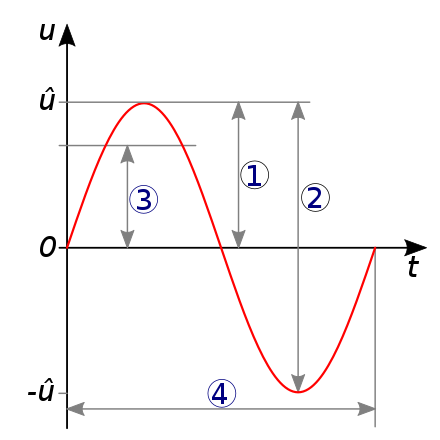
    
- Peak amplitude 
- Peak-to-peak amplitude 
- Root mean square amplitude 
- Wave period (not an amplitude)
</div>



In [27]:
def amplitude_envelope(data):
    frame_size=1024
    hop_length=512
    amplitude = np.array([max(data[i:i+frame_size]) for i in range(0, len(data),hop_length)])
    return amplitude

### Mel Spectrogram

 <div>
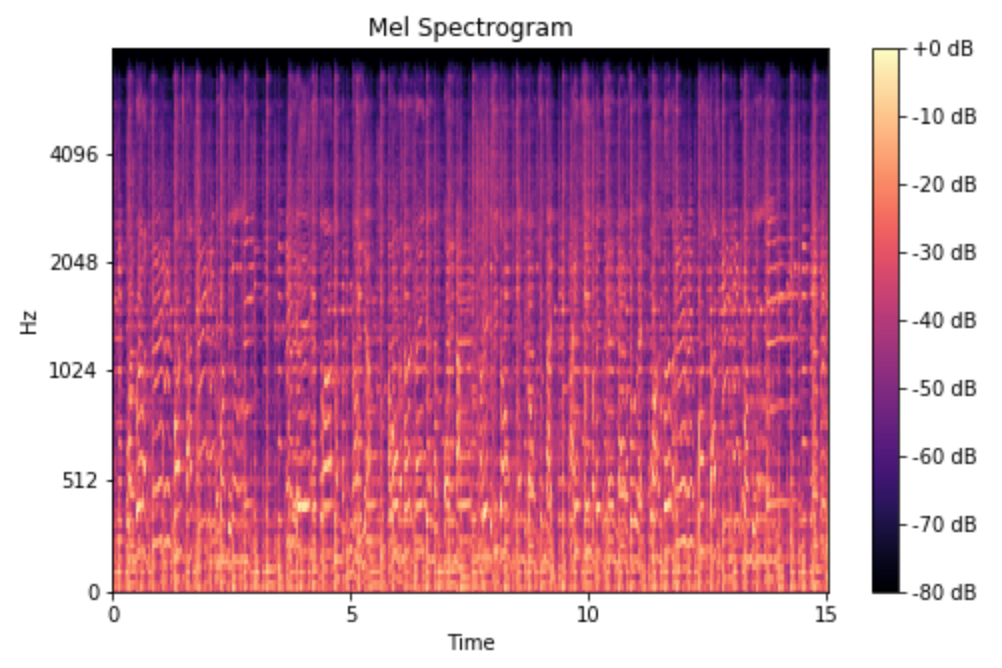
</div>
 - Mel-spectrogram is a spectrogram in which frequencies are converted to mel scale.



In [28]:
def mel_spectrogram(data,sr):
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    return mel_spec

### Extract Features From Audio Files

In [66]:
extracted_feature = []

def feature_extraction(audio_file,class_label):
   
    for file in tqdm(audio_file ):
        
        file_name = file
        class_label = class_label 
        
        data, sr = librosa.load(file_name)
        
        y_min = data.min()
        y_max = data.max()
        y_mean = data.mean()
        y_std = data.std()
    
        zcr = zero_crossing_rate(data)
        zcr_mean = zcr.mean()
        zcr_max = zcr.max()
        zcr_min = zcr.min()
    
        spectral_cent = spectral_centroid(data,sr)
        spectral_cent_min = spectral_cent.min()
        spectral_cent_mean = spectral_cent.mean()

        rms = rmse(data)
        rms_mean = rms.mean()

        amplitude = amplitude_envelope(data)
        amp_mean = amplitude.mean()
        amp_min = amplitude.min()

        mel_spec = mel_spectrogram(data,sr)
        melspec_mean = mel_spec.mean()
        melspec_std = mel_spec.std()

        extracted_feature.append([file_name, y_min, y_max, y_mean, y_std, zcr_mean, zcr_min, zcr_max,
                                  spectral_cent_min, spectral_cent_mean,
                                  rms_mean, amp_mean, amp_min, melspec_mean, melspec_std, class_label])
        
        

### Run Function

In [67]:
# Get extracted features to list for abnormals


feature_extraction(abnormal_files,1)

100%|███████████████████████████████████████| 1475/1475 [05:51<00:00,  4.20it/s]


In [68]:
len(extracted_feature)

1475

In [69]:
# Get extracted features to list for narmals

feature_extraction(normal_files,0)

100%|███████████████████████████████████████| 4075/4075 [16:06<00:00,  4.22it/s]


### Create DataFrame

In [70]:
features = pd.DataFrame(extracted_feature,columns=['file_name', 'y_min', 'y_max', 'y_mean', 'y_std', 
                                                                'zcr_mean', 'zcr_min', 'zcr_max',
                                                                'spec_cent_min','spec_cent_mean', 
                                                                'rms_mean', 'amp_mean', 
                                                                'amp_min', 'melspec_mean', 'melspec_std', 'class'])
                                                                
features.head()

,file_name,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,rms_mean,amp_mean,amp_min,melspec_mean,melspec_std,class
0,Audio_Files/0dB_fan/id_00/abnormal/00000059.wav,-0.032230,0.029817,-6.926849e-07,0.009295,0.031904,0.016113,0.054688,1056.230929,1195.770358,0.009263,0.020296,0.012419,0.020323,0.119019,1
1,Audio_Files/0dB_fan/id_00/abnormal/00000071.wav,-0.034450,0.028665,-6.027881e-07,0.009493,0.021894,0.009766,0.034668,703.965079,800.327823,0.009442,0.020580,0.013375,0.021241,0.128594,1
2,Audio_Files/0dB_fan/id_00/abnormal/00000065.wav,-0.034897,0.028662,5.634240e-06,0.009543,0.027962,0.010742,0.047852,871.776362,998.865525,0.009508,0.020938,0.015119,0.021519,0.125431,1
3,Audio_Files/0dB_fan/id_00/abnormal/00000273.wav,-0.024785,0.026773,5.817374e-07,0.006059,0.057802,0.017578,0.087402,1112.632569,1419.440256,0.006014,0.016007,0.010261,0.008460,0.032597,1
4,Audio_Files/0dB_fan/id_00/abnormal/00000267.wav,-0.034780,0.037046,1.282572e-06,0.004874,0.049731,0.016602,0.279785,771.766407,1154.008254,0.004715,0.012308,0.005732,0.005148,0.024881,1


### Create .csv File

In [73]:
features.to_csv('Datasets/fan_0db.csv',index=False)
